### Import dependencies

In [1]:
from polars_bio.io import read_fastq
from polars_bio.kmer import kmer_count, visualize_kmers

/home/kenjakendi/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:polars_bio:Creating BioSessionContext


### Load Data

In [2]:
file = read_fastq("../../tests/data/io/fastq/example.fastq")

INFO:polars_bio:Table: example registered for path: ../../tests/data/io/fastq/example.fastq


### Count k-mers

In [3]:
k = 5

kmers = kmer_count(
    k = k, 
    df = file,
)

0rows [00:00, ?rows/s]

200rows [00:00, 15861.08rows/s]


### Show result

In [4]:
display(kmers)

,kmer,count
0,TCGTA,2
1,GCCAC,20
2,ACTAG,9
3,CCCAC,24
4,TTCTT,43
...,...,...
1015,AGAAT,23
1016,CCTCC,53
1017,AGTCA,11
1018,TGTCA,28


In [5]:
kmers.sort_values(by='count', ascending=False)

,kmer,count
325,TTTTT,106
8,GGAGG,63
137,CCCAG,58
720,GGGAG,57
219,AGAAA,53
...,...,...
759,TAGCG,1
564,TCGCG,1
527,TACGC,1
422,ACGCG,1


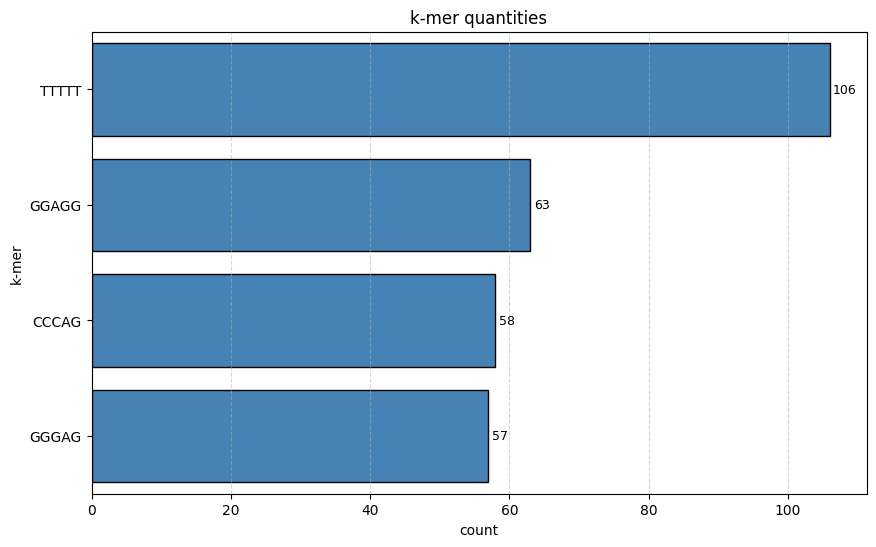

In [6]:
visualize_kmers(
    df = kmers,
    top_n=4,
)

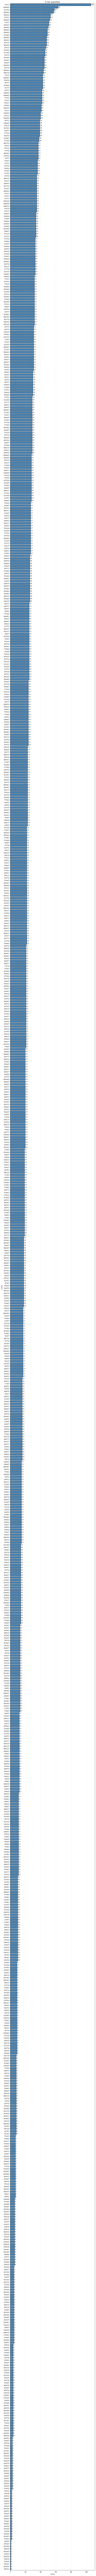

In [7]:
visualize_kmers(
    df = kmers,
)